In [ ]:
import numpy as np
import random
import os
import sys
import csv
import pickle
import shutil
from tqdm import tqdm
from numpy import genfromtxt
import os
import json

In [ ]:
with open("Sub20x20_full_grid.pkl", 'rb') as f:
    data = pickle.load(f)

In [3]:
por = [data[i][1] for i in range(len(data))]

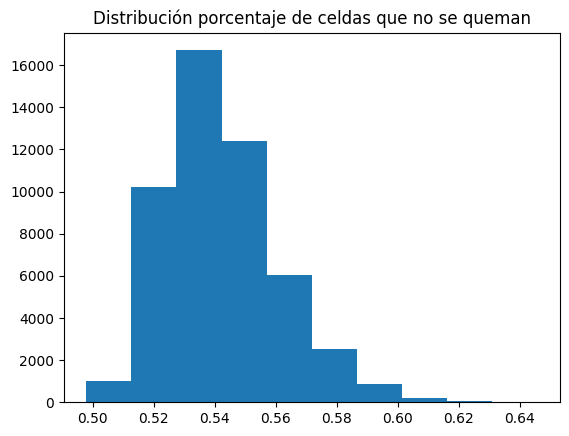

In [4]:
import matplotlib.pyplot as plt
plt.hist(por)
plt.title("Distribución porcentaje de celdas que no se queman")
plt.savefig("distribution.png")
plt.show() 


In [5]:
def write_firewall_file(solution):
    
    """Function that writes the final state in the format delimited for firewalls in a file called HarvestedCells.csv"""
    absolute_path =  os.getcwd()
    try:
        shutil.rmtree(f'{absolute_path}/../../../src/algorithms/eval/results/Grids/')
    except:
        pass
    i = 1
    firewalls = [1]
    for cell in solution.flatten():
        if cell == -1:
            firewalls.append(i)
        i+=1
    header = ['Year Number','Cell Numbers']
    with open(f'{absolute_path}/../../../src/algorithms/eval//harvested/HarvestedCells.csv', 'w', encoding='UTF8') as f:
        writer = csv.writer(f)

        # write the header
        writer.writerow(header)

        # write the data
        writer.writerow(firewalls)
    return

def erase_firebreaks():
    header = ['Year Number','Cell Numbers']
    absolute_path =  os.getcwd()
    path = f'{absolute_path}/../../../src/algorithms/eval//harvested/HarvestedCells.csv'
    # We empty out the firebreaks file
    with open(path, 'w', encoding='UTF8') as f:
        writer = csv.writer(f)
        # write the header
        writer.writerow(header)

In [6]:
def calc_fitness(solution, n_sims = 100):
        """
        Calculates the average number of burned cells of embedding's associated
        solution.
        """
        absolute_path =  os.getcwd()
        root = f'{absolute_path}/../../../src/algorithms/'
        assert(solution.sum() == 20)
        write_firewall_file(solution * -1)
        n_weathers = len([i for i in os.listdir("Sub20x20/Weathers/") if i.endswith('.csv')])-2
        exec_str = f"{root}/eval/C2F-W/Cell2FireC/Cell2Fire --input-instance-folder Sub20x20/ --output-folder {root}/eval/results/ --sim-years 1 --nsims {n_sims}--Fire-Period-Length 1.0 --output-messages --ROS-CV 2.0 --seed 123 --weather random --ignitions --IgnitionRad 4 --sim C --final-grid --nweathers {n_weathers} --FirebreakCells {root}/eval/harvested/HarvestedCells.csv"
        os.system(exec_str + " >/dev/null 2>&1")
        reward = 0
        base_directory = f"{root}/eval/results/Grids/Grids"
        for j in range(1, n_sims+1):
            dir = f"{base_directory}{str(j)}/"
            files = os.listdir(dir)
            my_data = genfromtxt(dir+files[-1], delimiter=',')
            # Burned cells are counted and turned into negative rewards
            for cell in my_data.flatten():
                if cell == 1.0:
                    reward-= 1
        return 1 + ((reward/n_sims) / 400)

In [ ]:
for i in tqdm(range(len(data))):
    data[i][1] = calc_fitness(data[i][0])


  0%|          | 51/50000 [01:28<23:53:58,  1.72s/it]

In [ ]:
with open(f"Sub20x20_full_grid.pkl", "wb+") as write_file:
    pickle.dump(data, write_file)

In [ ]:
len(data)

50000